# Лекция №6 (доп)

## Основы цифровой обработки сигналов

## Сигналы

*Сигналом* называется физический процесс, параметры которого изменяются в соответствии с передаваемым сообщением. Cигнал является материальным носителем информации. По способу представления сигналы разделяются на две группы – *случайные* и *детерминированные*. Их описывают математической моделью или функцией, характеризующей изменение параметров сигнала.  

*Случайным* сигналом называют функцию времени, значения которой заранее неизвестны и могут быть предсказаны лишь с некоторой *вероятностью*. К основным характеристикам случайных сигналов относятся:

* закон распределения (относительное время пребывания значения сигнала в определенном интервале),
* спектральное распределение мощности.

*Детерминированные* сигналы описываются аналитической функцией (задаются аналитически), и их поведение полностью известно в любой момент времени. Детерминированные сигналы в свою очередь бывают *периодическими* и *непериодическими*. Непериодические сигналы, как правило, ограничены во времени. 

*Периодический* сигнал - это сигнал, который повторяется во времени с определенным периодом, то есть для которого выполняется условие:

$s(t) = s(t+kT)$, 

где *k* – любое целое число, *T* – период повторения.

Пример *периодического* сигнала – гармоническое колебание, описываемое следующим выражением:

$s(t) = A \cdot cos(\frac{2\pi\cdot t}{T} +\phi)$, 

где *A* – амплитуда колебания, φ – начальная фаза. 

Известно, что любой сложный периодический сигнал может быть представлен в виде суммы гармонических колебаний с частотами, кратными основной частоте **ω = 2π/T**. 

### Цифровые сигналы

Все сигналы можно разделить на четыре группы: 
* аналоговые, 
* дискретные, 
* квантованные,
* цифровые.

**Аналоговый** сигнал – описывается непрерывной функцией времени. Аналоговый сигнал обеспечивает передачу данных путем непрерывного изменения во времени амплитуды, частоты или фазы. Практически все физические процессы описываются непрерывными функциями времени, поэтому представляют собой аналоговые сигналы. Для аналогового сигнала область значений и определения описывается *непрерывным множеством*. 

Для **дискретного** сигнала свойственно прерывистое (дискретное) изменение сигнала во времени. То есть изменения в сигнале происходят скачкообразно через некоторые промежутки времени, называемые интервалом дискретизации – Δt или Td. Дискретизация *аналогового сигнала* состоит в том, что сигнал представляется в виде последовательности значений, взятых в дискретные моменты времени, которые называются *отсчётами* (сэмплами). 

**Квантованные** сигналы принимают ряд конечных значений из диапазона непрерывных или дискретных величин. Как правило, сигналы квантуются по уровню, то есть по амплитуде.

**Цифровые** сигналы получаются из аналоговых с помощью операций **дискретизации** и **квантования** по уровню. Значениям цифрового сигнала присваивается кодовое слово или набор символов (зачастую двоичных). 

Устройства, осуществляющие дискретизацию по времени и квантование по уровню, называются **аналого-цифровыми преобразователями (АЦП)**.
Устройства, переводящие цифровой сигнал в аналоговый называются **цифро-аналоговыми преобразователями (ЦАП)**. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

%matplotlib inline

Напомним, что магическая функция `%matplotlib inline` позволяет отображать графики без вызова метода `plt.show()`

На приведенном ниже примере представлены сигналы в аналоговой, дискретной и квантованной форме.

**Шаг 1**: создать ряд временных значений:
Функция `np.linspace(start, stop, num)` задает вектор в диапазоне [start, stop], а *num* - количество точек в диапазоне.

**Шаг 2**: создать сигнал произвольной формы:
С помощью функции `np.sin()` задаём сигнал из набора гармонических воздействий. Для простоты амплитуды всех компонент равны 1, а смещение по фазе нулевое.

**Шаг 3** Отрисовка графиков.
Методы matplotlib задают различный стиль отображения:
* `plot()` - стандартный график, выводит сигнал в аналоговой форме,
* `stem()` - график в виде отсчетов, выводит сигнал в дискретной форме,
* `step()` - график в виде уровней, выводит сигнал в квантованной форме.

Для уменьшения количества кода создана вспомогательная функция `plt_sel(s, *args, **kwargs)`, которая выбирает стиль отображения графика. Аргументы `*args` передают значения по осям ординат и абсцисс, `**kwargs` используется для передачи параметров в метод `stem()`.

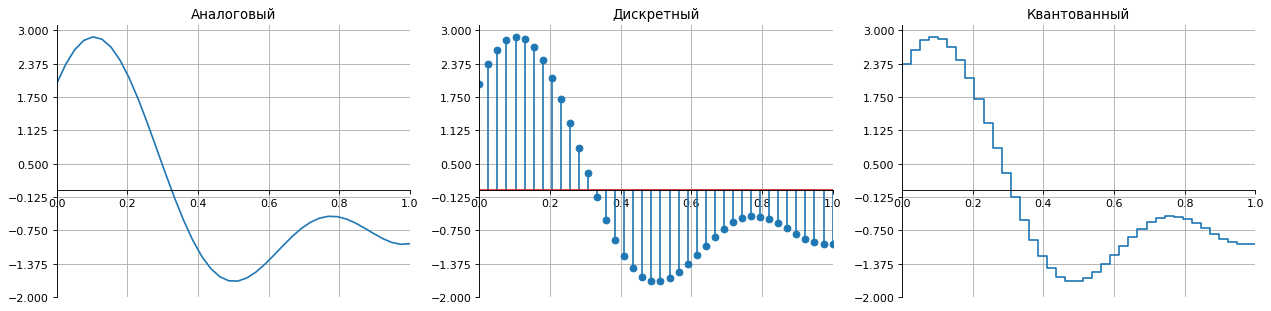

In [2]:
n = 40
# time vector
t = np.linspace(0, 1, n, endpoint=True)
# sine wave
x = np.cos(1.5*np.pi*t) + np.sin(2*np.pi*t) + np.cos(3*np.pi*t) + np.sin(3*np.pi*t)

# Select: plot, stem, bar
def plt_sel(s, *args, **kwargs):
    if s == 0:
        return plt.plot(*args)
    if s == 1:
        return plt.stem(*args, **kwargs)
    if s == 2:
        return plt.step(*args)

# Subplot titles
t_titles = ['Аналоговый', 'Дискретный', 'Квантованный']

# Plot figures
fig = plt.figure(figsize=(16, 4), dpi=80)
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(t_titles[i]) 
    plt_sel(i, t, x)
    plt.xlim([0, 1])
    plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
    plt.grid(True)
    
    # change plot view
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
plt.tight_layout()

Если шаг квантования и дискретизации выбраны неправильно, преобразование сигнала из аналоговой формы в дискретную будет происходить с искажениями. Покажем на примере неграмотный выбор шага дискретизации и шага квантования.

Зададим график косинуса. Длина сигнала `n = 64` отсчетов, на которых укладывается один период гармонического сигнала. Установим шаг квантования таким образом, чтобы иметь выборку из `d = 3, 5, 8 и 32` отсчетов.

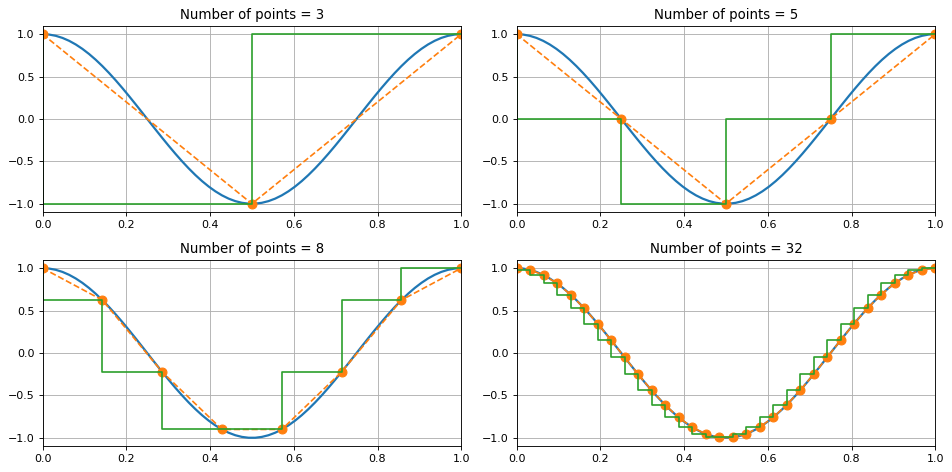

In [3]:
n = 64
# time vector
t = np.linspace(0, 1, n, endpoint=True)
# sine wave
ds = np.cos(2*np.pi*t)

# discrete step
step_lst = np.array([3, 5, 8, 32])

#plot figure
fig = plt.figure(figsize=(12, 6), dpi=80)
for i in range(4):
    tt = np.linspace(0, 1, step_lst[i], endpoint=True)
    
    plt.subplot(2, 2, i+1)
    plt.title('Number of points = {}'.format(step_lst[i]))
    plt.plot(t, ds, '-', linewidth=2.0)
    plt.plot(tt, np.cos(2*np.pi*tt), '--o', linewidth=1.5, markersize=8)
    plt.step(tt, np.cos(2*np.pi*tt), linewidth=1.5)
    plt.grid()
    plt.xlim([0, 1])
plt.tight_layout()

Как видно, наихудшая форма сигнала получилась при большом значении шага дискретизации, то есть большом расстоянии между соседними отсчетами цифрового сигнала. 
Чем меньше расстояние между соседними отсчетами (меньше шаг дискретизации и больше число точек последовательности), тем лучше дискретный сигнал повторяет форму аналогового сигнала.
____

### Дискретные последовательности

**Дискретной последовательностью** называется математическая модель дискретного сигнала, представляющая собой решетчатую функцию: x(nT) = x(n), где *T* – интервал дискретизации, *n* = 0, 1, 2, ..., N-1 - отсчёты или сэмплы. 

Пример конечной дискретной последовательности `x(nT) = {2, 1, -2, 0, 2, 3, 1, 0}`. Данная последовательность выглядит, как показано на рисунке:

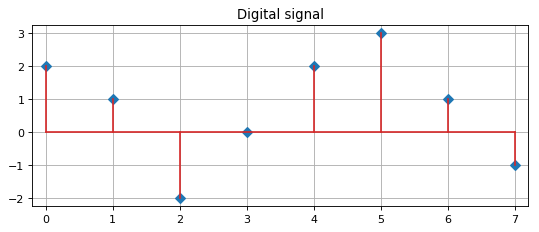

In [4]:
# Digital signal
xt = np.array([2, 1, -2, 0, 2, 3, 1, -1])
# Time vector
t = np.linspace(0, xt.size-1, xt.size, endpoint=True)

# Plot figure
fig = plt.figure(figsize=(8, 3), dpi=80)
plt.title('Digital signal') 
plt.stem(t, xt, linefmt='C3', markerfmt='D')
plt.xticks(t)
plt.xlim([np.min(t)-0.2, np.max(t)+0.2])
plt.grid(True)

### Дельта-функция

**Единичный импульс** – простейшая дискретная последовательность. Это дискретная δ-функция δ(nT) *Дирака*, которая равна единице при n = 0 и нулю при всех остальных значениях n.

Дискретная δ-функция, смещенная во времени на **m** тактовых интервалов, записывается следующим образом: `δ(nT-mT)`.

### Единичный скачок

Единичный скачок или **функция Хевисайда** – еще один вид простых и важных дискретных последовательностей. Он принимает нулевые значения в отрицательной области времени и единичные значения в положительной. 

Математически функция единичного скачка записывается как: 

`σ(nT) = δ(nT) + δ(nT - T) + δ(nT – 2T) + ...`

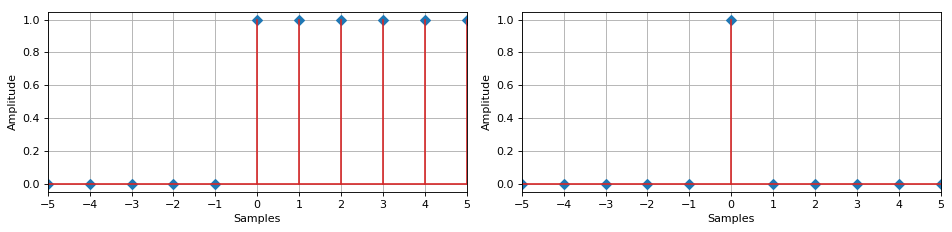

In [5]:
n = 6
# time vector
t = np.linspace(-n, n-1, 2*n)

# Delta function
xd = np.zeros(2*n)
xd[n] = 1

# Heaviside function
xh = np.heaviside(t, 1)

# Combine them together
xs = [xh, xd]

# Plot results
fig = plt.figure(figsize=(12, 3), dpi=80)
for i, sig in enumerate(xs):
    plt.subplot(1, 2, i+1)
    plt.stem(t, sig, linefmt='C3', markerfmt='D')
    plt.ylabel('Amplitude')
    plt.xlabel('Samples')
    plt.xticks(t)
    plt.xlim([np.min(t)+1, np.max(t)])
    plt.grid(True)
plt.tight_layout()

Дискретный единичный скачок `σ(n)` и дискретная δ-функция `δ(n)` связаны между собой следующими соотношениями:

$\delta(nT) = \sigma(nT) - \sigma(nT-T)$ , 

$\sigma(nT) = \sum_{k=0}^{+\infty}\delta(nT-kT)$ ,

Произвольная дискретная последовательность может быть записана в виде взвешенной суммы δ-функций:

$x(nT) = \sum_{k=0}^{+\infty}x(kT)\cdot\delta(nT-kT)$ ,

Последовательность x(nT) называется периодической, если она удовлетворяет условию `x(nT) = x(nT+mNT)`,  
где 
- m и N – целые числа, m = 0, 1, 2, ..., NT 
- *NT* – период дискретной последовательности. 


## Спектр сигнала

Из предыдущей части вы узнали, что *сигнал* - это физический процесс во времени, параметры которого изменяются в соответствии с передаваемым сообщением. Мы научились представлять дискретные (цифровые) сигналы во времени. В этом разделе будет показан переход между временной и частотной областями для дискретных сигналов.

### Прямое преобразование Фурье

Чтобы преобразовать сигнал из временной области в частотную и обратно необходимо выполнить операцию под названием дискретное **преобразование Фурье**.

Запишем формулу прямого преобразования Фурье для дискретной последовательности x(nT). Прямым дискретным преобразованием Фурье (ДПФ) называется преобразование последовательности  `x(n), n = 0, ... , N–1` в последовательность `X(k), k = 0, ..., N–1` по следующей формуле:

$X(k) = \sum_{n=0}^{N-1}x(nT)\cdot e^{(-2\pi j\cdot nk/N)} = \sum_{n=0}^{N-1}x(nT)\cdot W^{-nk}$  

где $k = 0, ..., N-1$.

- $N$ – количество компонент разложения, число измеренных за период значений сигнала;
- $n$ – номер отсчета дискретизированного сигнала, n = 0,1, ... , N–1;	
- $k$ – номер гармоники компонента преобразования, а T — период времени, в течение которого брались входные данные; 
- $W = e^{-2\pi j / N}$ – поворотный множитель.

В этой формуле $X(kT) = X(e^{j\omega T})$ является спектральной плотностью (спектром) дискретной последовательности. Выражение для спектра дискретной последовательности можно найти, заменив в её Z-форме переменную $z = e^{j\omega T}$  

Для аналоговых сигналов выражение суммы превращается в интеграл.

Используя **формулу Эйлера** $e^{j\omega T} = cos(\omega T) + j\cdot sin(\omega T)$, можно определить *вещественную* и *мнимую* составляющие, а также **модуль** и **аргумент** спектральной плотности, которые связаны с вещественной и мнимой частями спектра через формулы теории функции комплексного переменного. 

Модуль:  

$|X(kT)| = \sqrt{Re(X)^2 + Im(X)^2}$ 

Фаза:  

$arg(X(kT)) = \arctan{\frac{Im(X)}{Re(X)}}$ 

Таким образом, ДПФ для $N$ входных отсчетов сигнала ставит в соответствие N спектральных отсчётов. Из формулы ДПФ для вычисления одного спектрального отсчета требуется N операций комплексного умножения и сложения. Поскольку таких операций $N$, то общая вычислительная сложность ДПФ равна $N^2$

### Обратное преобразование Фурье

**Обратное дискретное преобразование Фурье** (ОДПФ) есть перевод последовательности `X(k), k = 0, ..., N–1` в последовательность `x(n), n = 0, ... , N–1` по формуле:

$x(nT) = \frac{1}{N}\sum_{n=0}^{N-1}X(k)\cdot e^{(2\pi j\cdot nk/N)} = \frac{1}{N}\sum_{n=0}^{N-1}X(k)\cdot W^{nk}$  


где `x(n)` –  измеренная последовательность в дискретных временных точках, значения которой являются исходными данными для прямого преобразования и выходными для обратного
`X(k)` – N–последовательность комплексных амплитуд синусоидальных сигналов, образующих исходный сигнал `x(n)`; значения последовательности являются выходными данными для *прямого* преобразования и входными для *обратного*

Поскольку амплитуды спектральных отсчетов - комплексные величины, то по ним можно вычислить одновременно и амплитуду, и фазу сигнала.

____

Как следует из теоремы **Найквиста-Котельникова**, ДПФ точно соответствует непрерывному преобразованию Фурье, если преобразуемая функция есть функция с ограниченным спектром, при этом частота дискретизации **Fд** должна быть не меньше удвоенной максимальной частоты спектра **Fв**. Следует отметить, что для ДПФ справедливы правила и свойства, которые были рассмотрены для Z-преобразования. Матрицей `k * n` элементов можно определить ДПФ. 

____

### Особенности спектров дискретных сигналов.  
1. Спектральная плотность дискретного сигнала – периодическая функция с периодом, равным частоте дискретизации.

2. Если дискретная последовательность **вещественная**, то модуль спектральной плотности такой последовательности есть **четная** функция, а аргумент – **нечетная** функция частоты. 

3. При сдвиге спектра $X(e^{j\omega T})$ последовательности $x(nT)$ по оси частот вправо на величину $\psi$ получим спектр $Y(e^{j\omega T}) = Y(e^{j(\omega-\psi) T})$ Такому спектру соответствует комплексная последовательность:

$y(nT) = e^{j\psi nT} \cdot x(nT) = \cos{(\psi nT)} \cdot x(nT) + j \sin{(\psi nT)} \cdot x(nT)$

Сдвиг спектра $X(e^{j\omega T})$ последовательности $x(nT)$ по оси частот влево на величину $\psi$ происходит путем умножения последовательности $x(nT)$ на комплексную экспоненту $e^{j\psi nT}$

4. При сдвиге дискретного сигнала $x(nT)$ **вправо** по временной оси на m тактов (реализация задержки) получаем сигнал $x(n) = x(nT - mT)$, Z-преобразование и спектральная плотность которого имеют вид:

$Z[y(nT)] = Z[x(nT-mT)] = X(z)\cdot z^{-m}$  

$Y(\omega) = e^{-j\omega mT} \cdot X(e^{j\omega T})$  

In [6]:
from scipy.fftpack import fft, ifft, fftshift

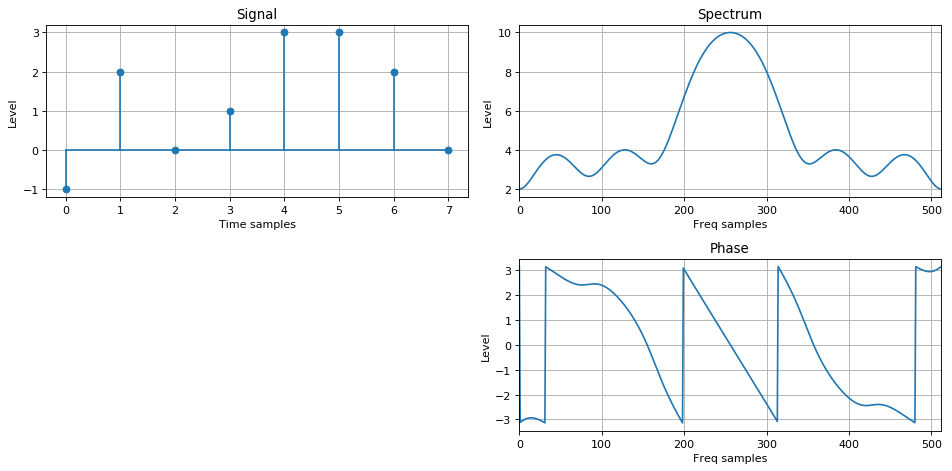

In [7]:
# signal
x = np.array([-1, 2, 0, 1, 3, 3, 2, 0])
# Z-form: X(z) = 1 + 2z^(-1)+z^(-3), where z = exp(-jwT)

# Forward FFT
N = 512
xFFT = fftshift(fft(x, N))
# Magnitude spectrum
xA = np.abs(xFFT)
# Phase spectrum
xF = np.angle(xFFT)

# List of signals
xT = [x, xA, xF]
lst_title = ['Signal', 'Spectrum', 'Phase']

# Plot results
fig = plt.figure(figsize=(12, 6), dpi=80)
for i, sig in enumerate(xT):
    plt.subplot(2, 2, int(2**i))
    plt.ylabel('Level')
    plt.title(lst_title[i])
    if i == 0:
        plt.stem(sig, basefmt='C0')
        plt.xlabel('Time samples')
    else:
        plt.plot(sig)
        plt.xlabel('Freq samples')
        plt.xlim([0, N-1])
    plt.grid()
plt.tight_layout()

### Свойства дискретного преобразования Фурье

1. **Линейность**: сумма спектров сигналов равна спектру суммы сигналов. 

Это свойство говорит о том, что спектр суммы независимых дискретных сигналов равен сумме спектров этих сигналов, а при умножении дискретного сигнала на константу, его спектр также умножается на эту константу.

2. **Сдвиг по отсчетам** (по времени)

Циклический сдвиг сигнала на m отсчётов приводит к повороту фазового спектра, а амплитудный спектр при этом не изменяется. 

$X'(k) = X(k) \cdot e^{- \frac{2\pi j}{N} k m} $

3. **ДПФ от чётных и нечётных функций** 

ДПФ четной функции вырождается в косинусное преобразование Фурье  

$X(k) = \sum_{n=0}^{N-1}x(n)\cdot \cos{(2\pi nk/N)}$

ДПФ нечетной функции вырождается в синусное преобразование Фурье  

$X(k) = \sum_{n=0}^{N-1}x(n)\cdot \sin{(2\pi nk/N)}$

где $k = 0, ..., N-1$.

4. **ДПФ циклической свёртки сигналов** 

Для сигнала $x(n)$, который является результатом циклической свертки двух сигналов $a(b)$ и $b(n)$:  

$x(n) = \sum_{m=0}^{N-1}a(n)\cdot b(n-m)$

N-точечное ДПФ последовательности равно:  

$X(k) = A(k) \cdot B(k)$ ,  

где $A(k), B(k)$ - спектры сигналов. 

Таким образом, спектр циклической свертки двух сигналов равен произведению спектров этих сигналов. Это свойство позволяет использовать быстрые алгоритмы ДПФ для вычисления свертки.

5. **ДПФ произведения сигналов** 

Для сигнала $x(n)$, который является результатом произведения двух сигналов $a(b)$ и $b(n)$ спектр равен:

$X(k) = \frac{1}{N} \sum_{m=0}^{N-1}A(m)\cdot B(k-m)$

Спектр произведения двух сигналов представляет собой циклическую свертку спектров этих сигналов.

6. **Сдвиг по частоте** 

Аналогично второму свойству (временной сдвиг), если имеется сдвинутый по частоте на m спектр $X(k–m)$, то после ОДПФ последовательность $x(n)$ принимает следующий вид:  

$x'(n) = x(n)\cdot e^{\frac{2\pi j}{N} k m}$ 

Отсюда следует, что сдвиг спектра осуществляется умножением сигнала на комплексную экспоненту. Это свойсто используется для переноса частот по диапазону. Заметим, что после умножения на экспоненту сигнал будет комплексным, а его спектр перестанет быть симметричным.

7. **Теорема Парсеваля** 

Средняя мощность дискретизированной функции времени равна сумме мощностей отдельных спектральных составляющих и не зависит от их фаз. 

Нормированная энергия сигнала $x(n)^2$ равна:

$\sum_{n=0}^{N-1}x^{2}(n) = \frac{1}{N} \sum_{n=0}^{N-1} |{X^{2}(k)}|$  


Как видно, свойства ДПФ имеют свойство двойственности, которое заключается в том, что все свойства ДПФ справедливы как для сигнала, так и для спектра. 

____

### Спектр гармонического сигнала

Покажем, как выглядит спектр гармонического сигнала. Для этого зададимся длиной БПФ `N = 32` отсчёта. Посмотрим, что происходит при вычислении ОБПФ для сигнала, который задан в частотной области в виде единичного отсчета на определенной позиции.

Обратите внимание, что вычисляется прямое БПФ, поскольку операции БПФ и ОБПФ равнозначны и отличаются на константу и знак в поворачивающих множителях.

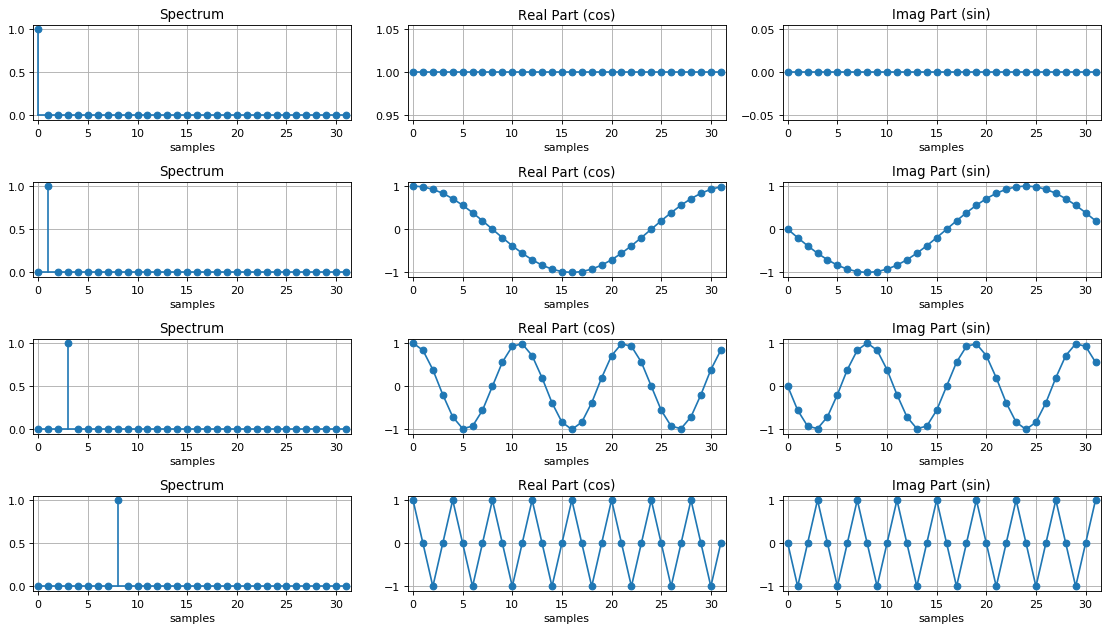

In [8]:
N, M = 32, 4

# Create freq signal
x = np.zeros((N,M))
x[0][0] = 1
x[1][1] = 1
x[3][2] = 1
x[8][3] = 1

# Calculate FFT
X = fft(x, axis=0)

# Plot results
fig = plt.figure(figsize=(14, 8), dpi=80)
for i in range(M*3):
    plt.subplot(4, 3, i+1)
    if i % 3 == 0:
        plt.title('Spectrum')
        plt.stem(x[:,i//3], basefmt='C0')
    if (i-1) % 3 == 0:
        plt.title('Real Part (cos)')
        plt.plot(np.real(X[:,i//3]), '-o')
    if (i-2) % 3 == 0:
        plt.title('Imag Part (sin)')
        plt.plot(np.imag(X[:,i//3]), '-o')      
    plt.xlim([-0.5, N-0.5])
    plt.xlabel('samples')
    plt.grid()
plt.tight_layout()

## Основы цифровой обработки сигналов

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../../img/8_ka.jpg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([]), plt.yticks([])
plt.show();

ValueError: axes exceeds dimensionality of input

In [10]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
print(crow, ccol)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(12, 10))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

In [11]:
noise_img = img.copy()
mask = np.random.randint(0,2,size=noise_img.shape).astype(np.bool)
r = np.ones(noise_img.shape) * 255
noise_img[mask] = r[mask]

dft = cv2.dft(np.float32(noise_img), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

AttributeError: 'NoneType' object has no attribute 'copy'

In [ ]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

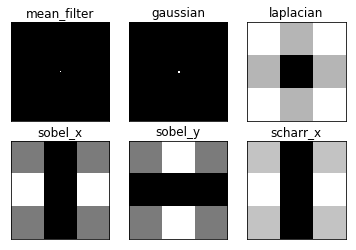

In [12]:
# simple averaging filter without scaling parameter
mean_filter = np.ones((255, 255))

# creating a guassian filter
x = cv2.getGaussianKernel(50,100)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    max_elem = np.max(mag_spectrum[i])
    mag_spectrum[i] = mag_spectrum[i] / max_elem * 255
    mag_spectrum[i] = mag_spectrum[i].astype(np.uint8)
    

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(mag_spectrum[i], cmap = 'gray')
    plt.title(filter_name[i])
    plt.xticks([]), plt.yticks([])

plt.show()